Task1

In [ ]:
import heapq
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict
from google.colab import files
from sklearn.decomposition import PCA

In [ ]:
uploaded_files = files.upload()
img_file = list(uploaded_files.keys())[0]
print(f"Successfully uploaded: {img_file}")

Saving NatureImg.png to NatureImg.png
Successfully uploaded: NatureImg.png


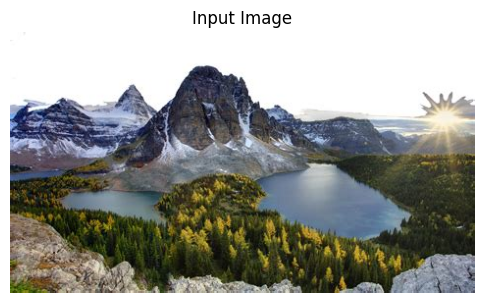

In [ ]:
def display_image(label, image_data, color_map=None):
    plt.figure(figsize=(6, 4))
    plt.imshow(image_data, cmap=color_map)
    plt.title(label)
    plt.axis("off")
    plt.show()

input_image = Image.open(img_file)
display_image("Input Image", input_image)

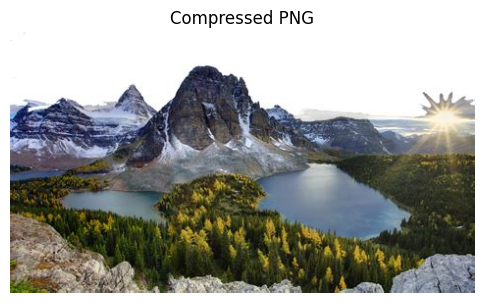

In [ ]:
buffer_stream = io.BytesIO()
input_image.save(buffer_stream, format="PNG", optimize=True)

compressed_png = Image.open(buffer_stream)
display_image("Compressed PNG", compressed_png)

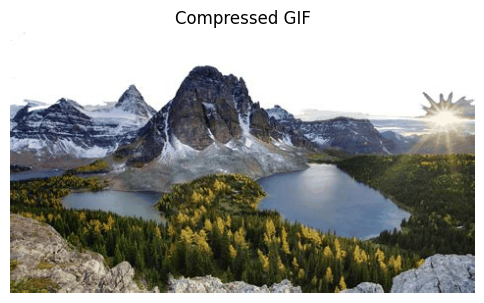

In [ ]:
gif_stream = io.BytesIO()
input_image.convert("P", palette=Image.ADAPTIVE, colors=256).save(gif_stream, format="GIF", optimize=True)

compressed_gif = Image.open(gif_stream)
display_image("Compressed GIF", compressed_gif)

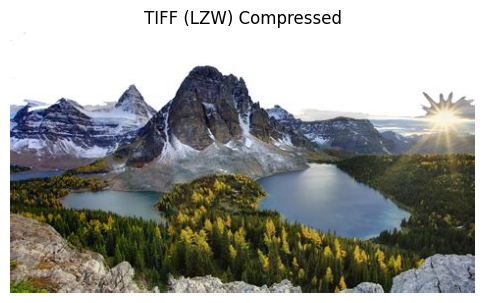

In [ ]:
tiff_stream = io.BytesIO()
input_image.save(tiff_stream, format="TIFF", compression="tiff_lzw")

compressed_tiff = Image.open(tiff_stream)
display_image("TIFF (LZW) Compressed", compressed_tiff)

In [ ]:
def display_image(label, image_data, cmap=None):
    plt.figure(figsize=(6, 4))
    plt.imshow(image_data, cmap=cmap)
    plt.title(label)
    plt.axis("off")
    plt.show()

RLE Encoded Data (Preview): [(255, 8), (252, 1), (255, 1), (252, 1), (255, 2), (245, 1), (233, 1), (241, 1), (255, 466), (252, 1), (255, 1), (252, 1), (254, 1), (255, 1), (247, 1), (237, 1), (245, 1), (255, 466), (253, 1), (255, 1)]


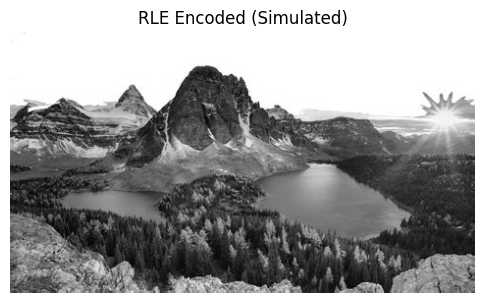

In [ ]:
def run_length_encode(image_array):
    flat_pixels = image_array.flatten()
    compressed_data = []
    prev_value = flat_pixels[0]
    count = 1

    for value in flat_pixels[1:]:
        if value == prev_value:
            count += 1
        else:
            compressed_data.append((prev_value, count))
            prev_value = value
            count = 1

    compressed_data.append((prev_value, count))
    return compressed_data

grayscale_image = input_image.convert("L")
grayscale_array = np.array(grayscale_image)

rle_encoded_data = run_length_encode(grayscale_array)
print("RLE Encoded Data (Preview):", rle_encoded_data[:20])

display_image("RLE Encoded (Simulated)", grayscale_array, cmap="gray")

Huffman Encoded Data (Preview): 1010101010101010010010000100100100001010111010001011110001110000111011111010101010101010101010101010


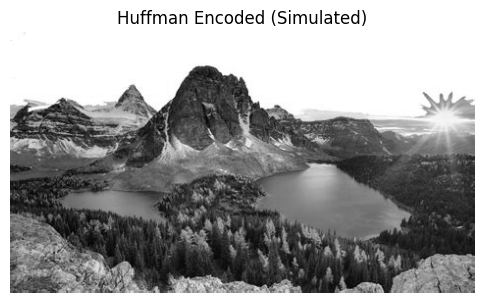

In [ ]:
class HuffmanTreeNode:
    def __init__(self, value, frequency):
        self.value = value
        self.frequency = frequency
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.frequency < other.frequency

def create_huffman_tree(freq_map):
    heap = [HuffmanTreeNode(val, freq) for val, freq in freq_map.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left_node = heapq.heappop(heap)
        right_node = heapq.heappop(heap)
        merged_node = HuffmanTreeNode(None, left_node.frequency + right_node.frequency)
        merged_node.left = left_node
        merged_node.right = right_node
        heapq.heappush(heap, merged_node)

    return heap[0]

def get_huffman_codes(node, binary_prefix="", encoding_dict={}):
    if node is not None:
        if node.value is not None:
            encoding_dict[node.value] = binary_prefix
        get_huffman_codes(node.left, binary_prefix + "0", encoding_dict)
        get_huffman_codes(node.right, binary_prefix + "1", encoding_dict)
    return encoding_dict

grayscale_pixels = grayscale_array.flatten()
pixel_freq_map = defaultdict(int)
for px in grayscale_pixels:
    pixel_freq_map[px] += 1

huffman_tree_root = create_huffman_tree(pixel_freq_map)
huffman_encoding_map = get_huffman_codes(huffman_tree_root)

encoded_huffman_data = "".join(huffman_encoding_map[px] for px in grayscale_pixels)
print("Huffman Encoded Data (Preview):", encoded_huffman_data[:100])

display_image("Huffman Encoded (Simulated)", grayscale_array, cmap="gray")

LZW Encoded Data (Preview): [255, 256, 257, 256, 252, 255, 260, 255, 245, 233, 241, 258, 267, 268, 269, 270, 271, 272, 273, 274]


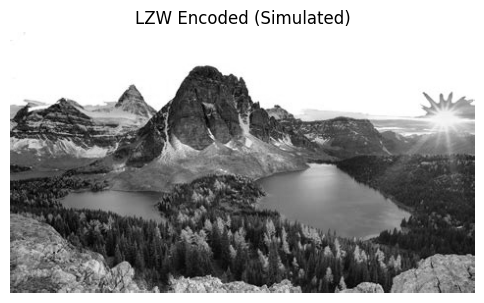

In [ ]:
def lzw_encode(input_data):
    codebook = {chr(i): i for i in range(256)}
    next_code = 256
    prefix = ""
    encoded_output = []

    for character in input_data:
        combined = prefix + character
        if combined in codebook:
            prefix = combined
        else:
            encoded_output.append(codebook[prefix])
            codebook[combined] = next_code
            next_code += 1
            prefix = character

    if prefix:
        encoded_output.append(codebook[prefix])

    return encoded_output

image_chars = "".join(chr(value) for value in grayscale_array.flatten())
lzw_encoded_data = lzw_encode(image_chars)
print("LZW Encoded Data (Preview):", lzw_encoded_data[:20])

display_image("LZW Encoded (Simulated)", grayscale_array, cmap="gray")

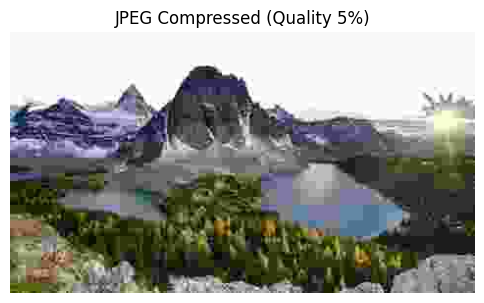

In [ ]:
jpeg_stream = io.BytesIO()
input_image = input_image.convert("RGB")
input_image.save(jpeg_stream, format="JPEG", quality=5)

compressed_jpeg = Image.open(jpeg_stream)
display_image("JPEG Compressed (Quality 5%)", compressed_jpeg)

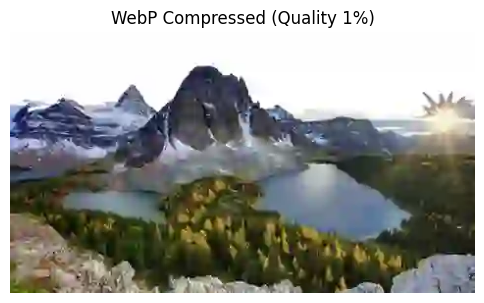

In [ ]:
webp_stream = io.BytesIO()
input_image.save(webp_stream, format="WEBP", quality=1)

compressed_webp = Image.open(webp_stream)
display_image("WebP Compressed (Quality 1%)", compressed_webp)

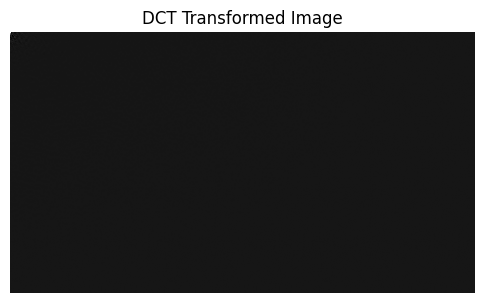

In [ ]:
def perform_dct(image):
    grayscale_img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    float_img = np.float32(grayscale_img) / 255.0
    dct_result = cv2.dct(float_img)
    return dct_result

dct_transformed_img = perform_dct(input_image)
display_image("DCT Transformed Image", dct_transformed_img, cmap="gray")

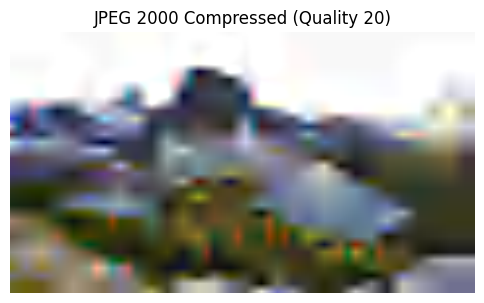

In [ ]:
jpeg2000_stream = io.BytesIO()
input_image.save(jpeg2000_stream, format="JPEG2000", quality_mode="dB", quality_layers=[20])

compressed_jpeg2000 = Image.open(jpeg2000_stream)
display_image("JPEG 2000 Compressed (Quality 20)", compressed_jpeg2000)

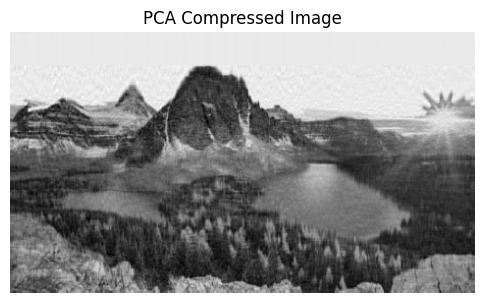

In [ ]:
def perform_pca(image, components=50):
    grayscale_img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    flat_img = grayscale_img.reshape(-1, grayscale_img.shape[1])

    pca_model = PCA(n_components=components)
    reduced_data = pca_model.fit_transform(flat_img)
    reconstructed_img = pca_model.inverse_transform(reduced_data)

    return reconstructed_img.reshape(grayscale_img.shape)

pca_transformed_img = perform_pca(input_image, components=50)
display_image("PCA Compressed Image", pca_transformed_img, cmap="gray")

Task2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_labels_cat = keras.utils.to_categorical(train_labels, 10)
test_labels_cat = keras.utils.to_categorical(test_labels, 10)

In [ ]:
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels_cat, val_labels_cat, train_labels, val_labels = train_test_split(
    train_images, train_labels_cat, train_labels, test_size=0.2, random_state=42
)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 422,922 (1.61 MB)

 Trainable params: 422,474 (1.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
training_history = model.fit(
    train_images, train_labels_cat, epochs=15, validation_data=(val_images, val_labels_cat)
)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.8870 - loss: 0.3717 - val_accuracy: 0.9798 - val_loss: 0.0650
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9762 - loss: 0.0846 - val_accuracy: 0.9854 - val_loss: 0.0502
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9834 - loss: 0.0595 - val_accuracy: 0.9863 - val_loss: 0.0547
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9863 - loss: 0.0463 - val_accuracy: 0.9882 - val_loss: 0.0433
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9885 - loss: 0.0412 - val_accuracy: 0.9872 - val_loss: 0.0456
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9894 - loss: 0.0372 - val_accuracy: 0.9879 - val_loss: 0.0503
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9904 - loss: 0.0337 - val_accuracy: 0.9890 - val_loss: 0.0469
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9927 - loss: 0.0

In [ ]:
eval_loss, eval_accuracy = model.evaluate(test_images, test_labels_cat)
print(f"Test Accuracy: {eval_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9930 - loss: 0.0284
Test Accuracy: 0.9937


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9930 - loss: 0.0284
Test Loss: 0.0238
Test Accuracy: 0.9937


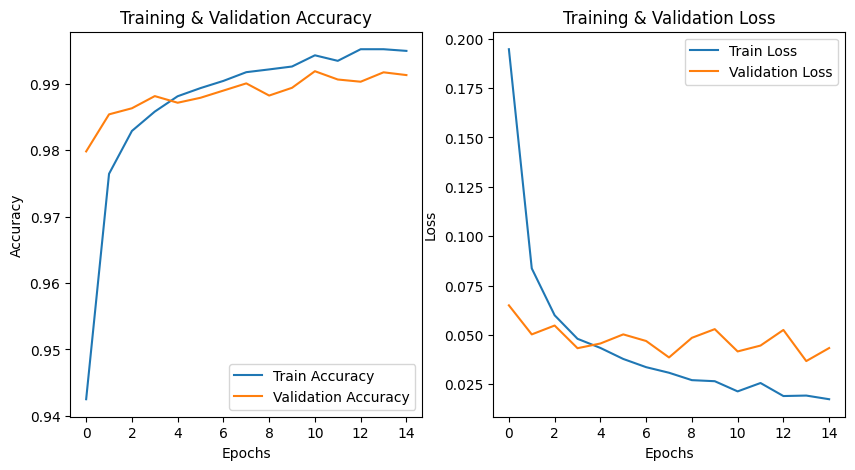

In [ ]:
eval_loss, eval_accuracy = model.evaluate(test_images, test_labels_cat)

print(f"Test Loss: {eval_loss:.4f}")
print(f"Test Accuracy: {eval_accuracy:.4f}")

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(training_history.history['accuracy'], label='Train Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(training_history.history['loss'], label='Train Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()

In [ ]:
predicted_probabilities = model.predict(test_images)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [ ]:
classification_results = classification_report(test_labels, predicted_labels, output_dict=True)
print(f"Precision: {classification_results['weighted avg']['precision']:.4f}")
print(f"Recall: {classification_results['weighted avg']['recall']:.4f}")
print(f"F1-Score: {classification_results['weighted avg']['f1-score']:.4f}")

Precision: 0.9937
Recall: 0.9937
F1-Score: 0.9937


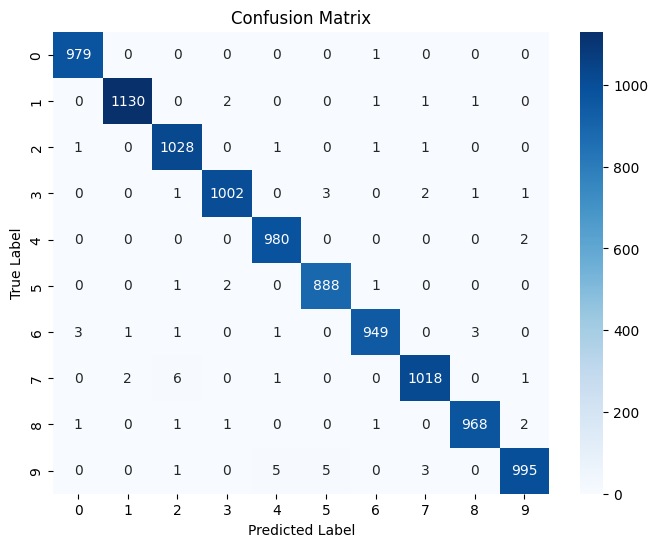

In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

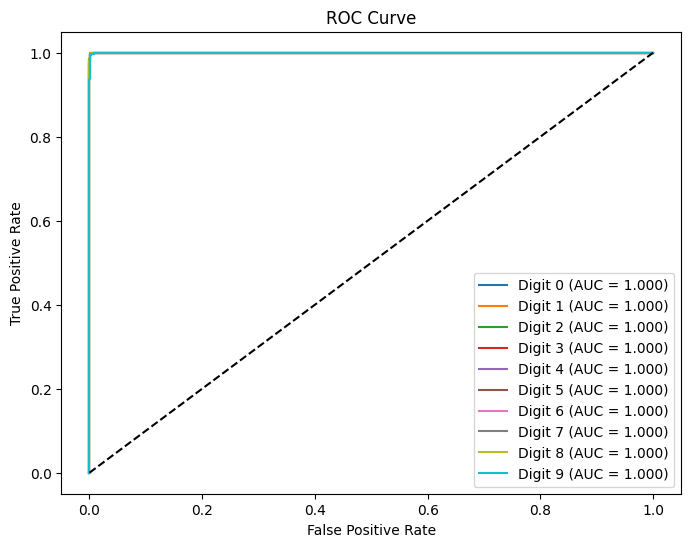

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
for digit in range(10):
    false_positive_rate, true_positive_rate, _ = roc_curve(test_labels_cat[:, digit], predicted_probabilities[:, digit])
    auc_score = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, label=f"Digit {digit} (AUC = {auc_score:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_labels_cat = keras.utils.to_categorical(train_labels, 10)
test_labels_cat = keras.utils.to_categorical(test_labels, 10)

In [ ]:
train_images, val_images, train_labels_cat, val_labels_cat, train_labels, val_labels = train_test_split(
    train_images, train_labels_cat, train_labels, test_size=0.2, random_state=42
)

In [ ]:
new_model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
training_history = new_model.fit(train_images, train_labels_cat, epochs=15, validation_data=(val_images, val_labels_cat), batch_size=64)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.1768 - loss: 2.1277 - val_accuracy: 0.4240 - val_loss: 1.5373
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.4198 - loss: 1.5439 - val_accuracy: 0.5772 - val_loss: 1.1816
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5619 - loss: 1.2352 - val_accuracy: 0.6439 - val_loss: 0.9978
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6428 - loss: 1.0280 - val_accuracy: 0.6945 - val_loss: 0.8888
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7017 - loss: 0.8714 - val_accuracy: 0.7164 - val_loss: 0.8076
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7359 - loss: 0.7683 - val_accuracy: 0.7228 - val_loss: 0.8131
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7702 - loss: 0.6798 - val_accuracy: 0.7592 - val_loss: 0.7241
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8002 - loss: 0.5956 - 

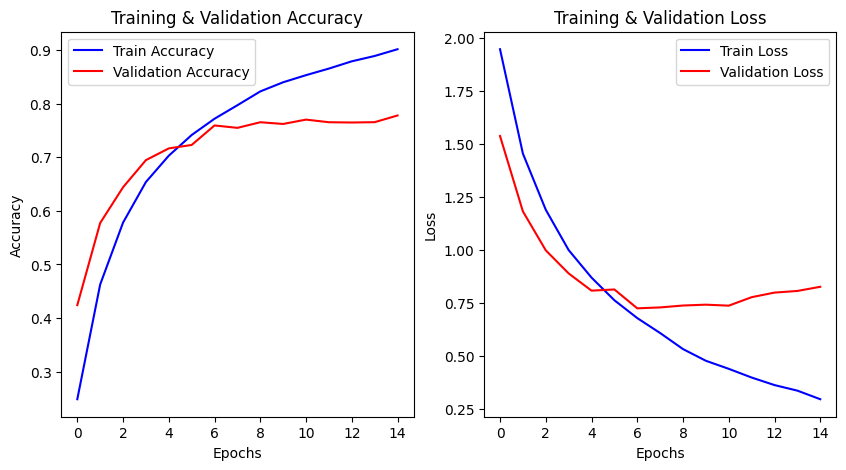

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(training_history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(training_history.history['loss'], label='Train Loss', color='blue')
plt.plot(training_history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()

In [ ]:
test_loss, test_accuracy = new_model.evaluate(test_images, test_labels_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7663 - loss: 0.8811
Test Accuracy: 0.7679


In [ ]:
predicted_probabilities = new_model.predict(test_images)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
classification_results = classification_report(test_labels, predicted_labels, output_dict=True)
print(f"Precision: {classification_results['weighted avg']['precision']:.4f}")
print(f"Recall: {classification_results['weighted avg']['recall']:.4f}")
print(f"F1-Score: {classification_results['weighted avg']['f1-score']:.4f}")

Precision: 0.7693
Recall: 0.7679
F1-Score: 0.7679


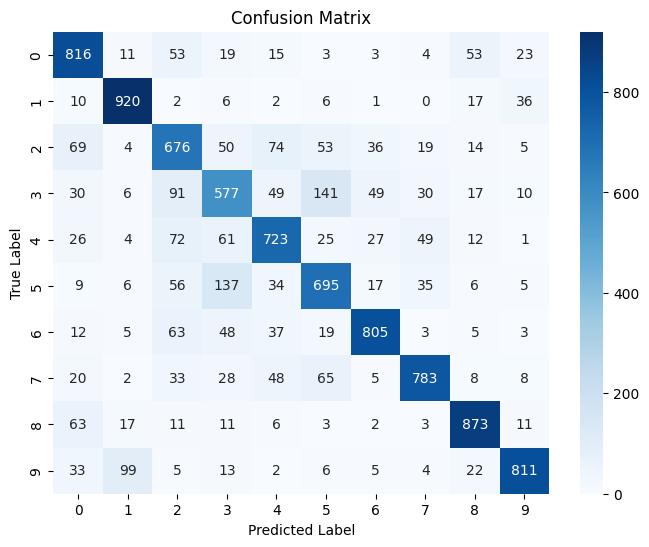

In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

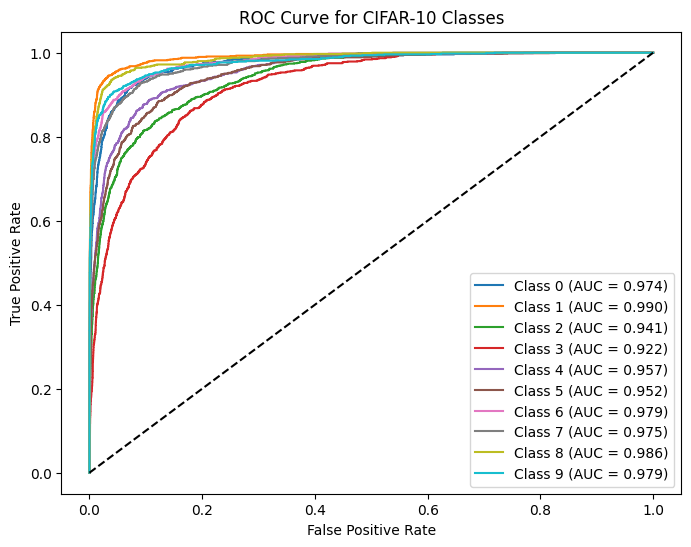

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
for class_idx in range(10):
    false_positive_rate, true_positive_rate, _ = roc_curve(test_labels_cat[:, class_idx], predicted_probabilities[:, class_idx])
    auc_score = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, label=f"Class {class_idx} (AUC = {auc_score:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for CIFAR-10 Classes")
plt.legend()
plt.show()